<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/RegressionCorrelation/ComplementaryExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complementary exercise in R

Problem:
In a field you want to know if it is convenient or not to place more cows to increase milk production taking into account the data of the current average production of liters per day depending on the quantity of cows

Hectares of the field: 100

Optimum number of cows per hectare: 1.5 

To mantain profit, we need liters per 1 cow: 6.2 (INVENTED FOR EXERCISE)

Current cows: 71

First, we will load the data and explore it a little bit. We have 29 observations of 2 variables:
- Vacas_Activas: independent variable, number of cows in a field
- Prod_lts: production of milk, in liters

In [98]:
h <- read.csv('datoscomplementario.csv',sep=';')

In [99]:
head(h)

,Vacas_Activas,Prod_lts
,<int>,<int>
1,15,112
2,17,127
3,19,142
4,21,157
5,23,172
6,25,187


In [100]:
summary(h)

 Vacas_Activas    Prod_lts    
 Min.   :15    Min.   :112.0  
 1st Qu.:29    1st Qu.:217.0  
 Median :43    Median :322.0  
 Mean   :43    Mean   :315.8  
 3rd Qu.:57    3rd Qu.:427.0  
 Max.   :71    Max.   :482.0  

In [101]:
str(h)

'data.frame':	29 obs. of  2 variables:
 $ Vacas_Activas: int  15 17 19 21 23 25 27 29 31 33 ...
 $ Prod_lts     : int  112 127 142 157 172 187 202 217 232 247 ...


Now we can plot both variables in a simple scatter plot. It looks like at first we have great increase in production when increasing the amount of cows. Then it begins to slow down. 

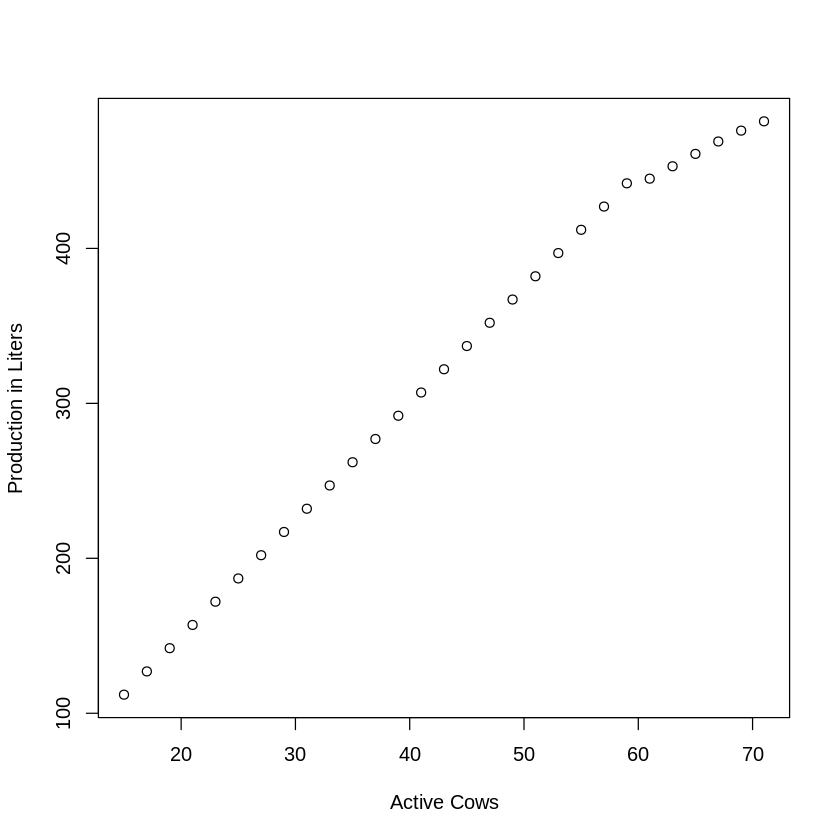

In [102]:
plot(h$Vacas_Activas,h$Prod_lts,xlab='Active Cows',ylab='Production in Liters')

Here we calculate the correlation between the two variables, and we can observe they are strongly correlated. 

In [103]:
cor(h)

,Vacas_Activas,Prod_lts
Vacas_Activas,1.0000000,0.9963175
Prod_lts,0.9963175,1.0000000


We could try to fit a linear, but we already know it is not going to be as good. Some points will end up above and some below, and probably will give us a horrible residual pattern. But most importantly, it won't reflect the fact that resources are limited and milk production has to decay if there are too many cows. 

That's why I decided to jump straight to the second order equation and seeing what's up. 

In [104]:
par1 <- lm(data=h,formula='h$Prod_lts~Vacas_Activas+I(Vacas_Activas^2)')

In [105]:
summary(par1)


Call:
lm(formula = "h$Prod_lts~Vacas_Activas+I(Vacas_Activas^2)", data = h)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.002  -4.139  -1.090   3.533  14.177 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -34.653691   7.765410  -4.463 0.000139 ***
Vacas_Activas        9.769548   0.395522  24.700  < 2e-16 ***
I(Vacas_Activas^2)  -0.032728   0.004531  -7.223 1.14e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.1 on 26 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9974 
F-statistic:  5304 on 2 and 26 DF,  p-value: < 2.2e-16


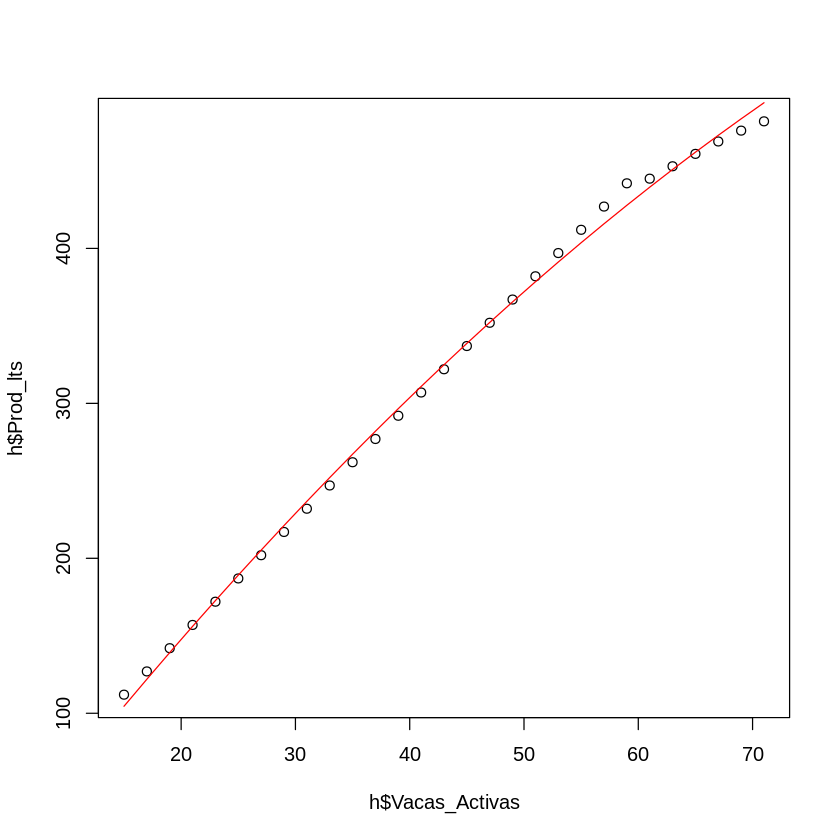

In [106]:
Prod_lts_pred <- predict(par1,newdata=h)
plot(h$Vacas_Activas,h$Prod_lts)
lines(h$Vacas_Activas,Prod_lts_pred,col='red',xlab='Active Cows',ylab='Production in Liters')

Let's see what the residuals are like. We see that they have clear tendences as well, and probably this is not the best fit possible. 

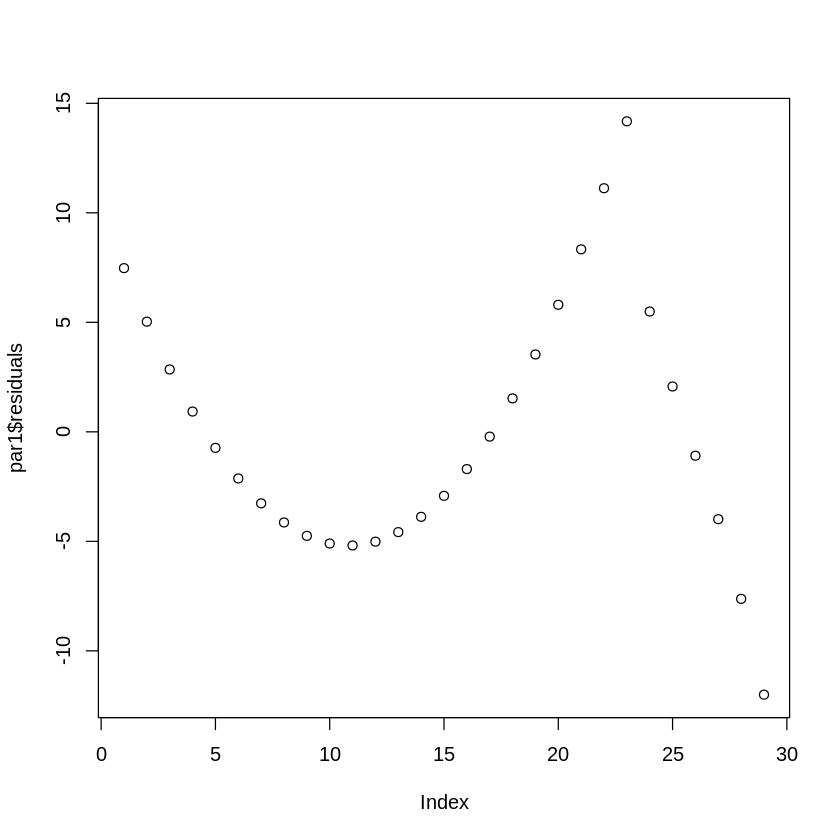

In [107]:
plot(par1$residuals)

That's why I kept on trying with other types of polynomials, growing in polynomial degree. For example, a tendence is observed in all the fit. Specially looking at the last part, which is the one that interests us, because we have to extrapolate from there. Comparing 4 and 5 degree, I found that 4 is optimal in the terms that it has a lesser risk of overfitting since it has less parameters, and a similar performance concerning residuals (that towards the end look below and above zero) and coefficient of determination. 

In [118]:
par2 <- lm(data=h,formula='h$Prod_lts~Vacas_Activas+I(Vacas_Activas^2)+I(Vacas_Activas^3)+I(Vacas_Activas^4)')

In [119]:
summary(par2)


Call:
lm(formula = "h$Prod_lts~Vacas_Activas+I(Vacas_Activas^2)+I(Vacas_Activas^3)+I(Vacas_Activas^4)", 
    data = h)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4887 -0.8818 -0.1761  0.3765  6.6260 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.649e+01  1.709e+01  -1.550  0.13428    
Vacas_Activas       1.140e+01  1.953e+00   5.837 5.10e-06 ***
I(Vacas_Activas^2) -2.045e-01  7.708e-02  -2.654  0.01390 *  
I(Vacas_Activas^3)  4.451e-03  1.262e-03   3.528  0.00172 ** 
I(Vacas_Activas^4) -3.407e-05  7.309e-06  -4.661 9.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.083 on 24 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 2.278e+04 on 4 and 24 DF,  p-value: < 2.2e-16


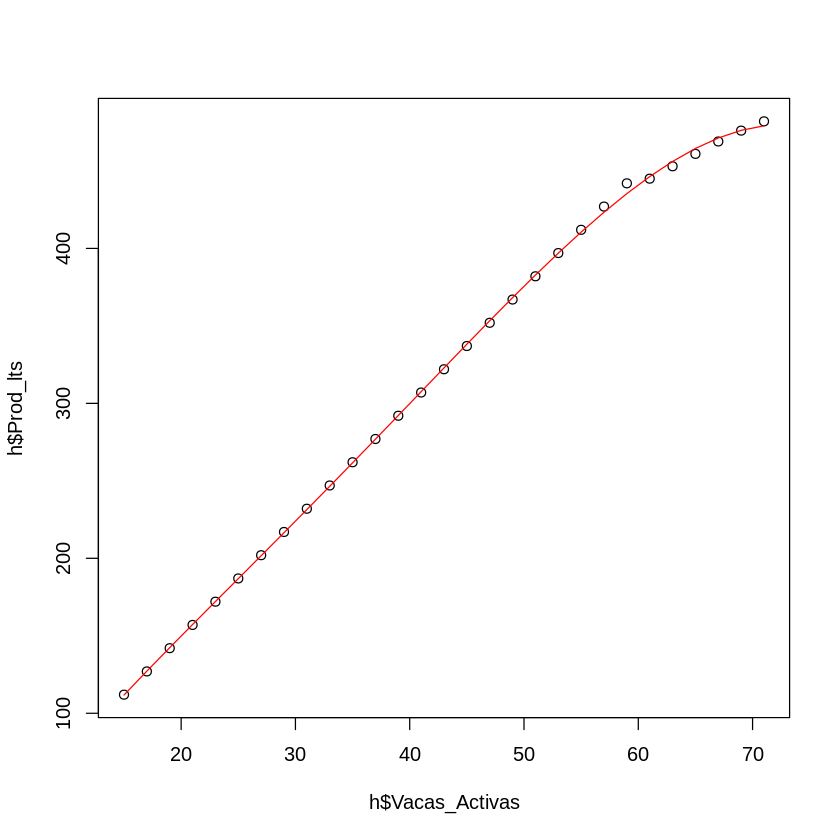

In [110]:
Prod_lts_pred <- predict(par2,newdata=h)
plot(h$Vacas_Activas,h$Prod_lts)
lines(h$Vacas_Activas,Prod_lts_pred,col='red',xlab='Active Cows',ylab='Production in Liters')

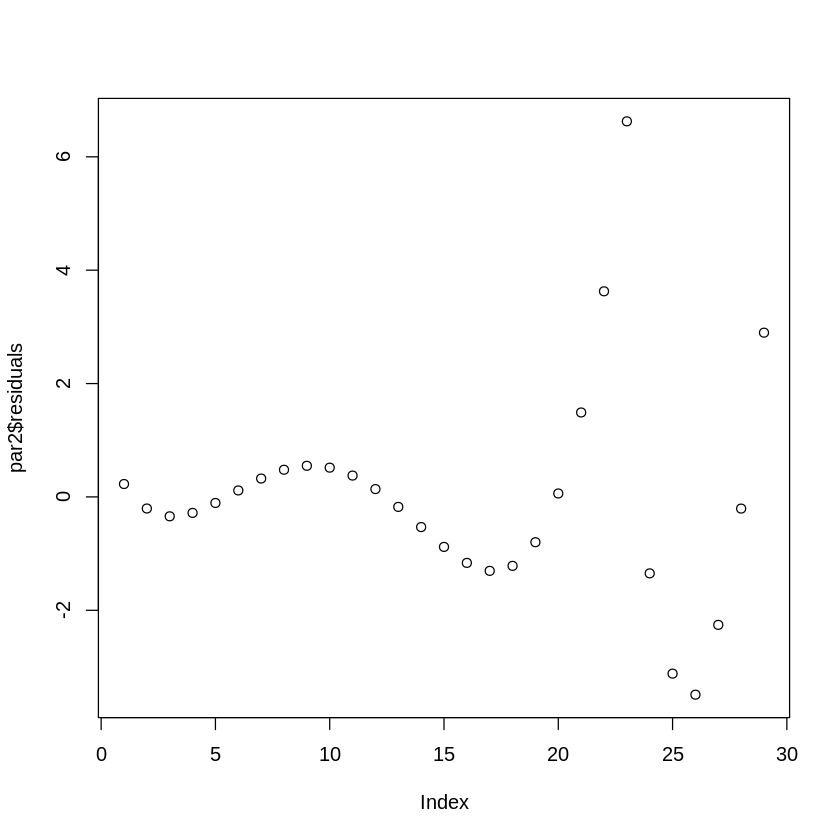

In [111]:
plot(par2$residuals)

Now we can do the predictions to see what it would be like if we put more cows in our field. Indeed, production would decay. 

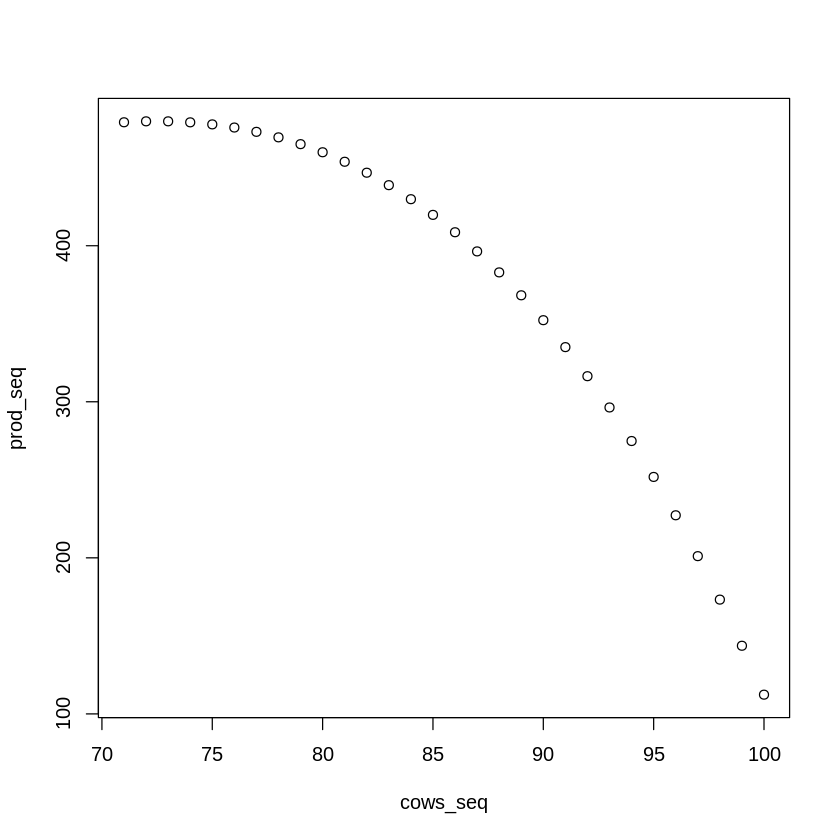

In [112]:
p <- par2$coefficients
p <- as.vector(p)
cows_seq = seq(max(h$Vacas_Activas),100)
prod_seq = p[1] + p[2]*cows_seq + p[3]*(cows_seq^2) + p[4]*(cows_seq^3) + p[5]*(cows_seq^4)
plot(cows_seq,prod_seq) 

Now let us unite both data in the same dataset and graph to see our data and the extrapolation our model gave us. 

In [113]:
cows_total = c(h$Vacas_Activas,cows_seq)
prod_total = c(h$Prod_lts,prod_seq)

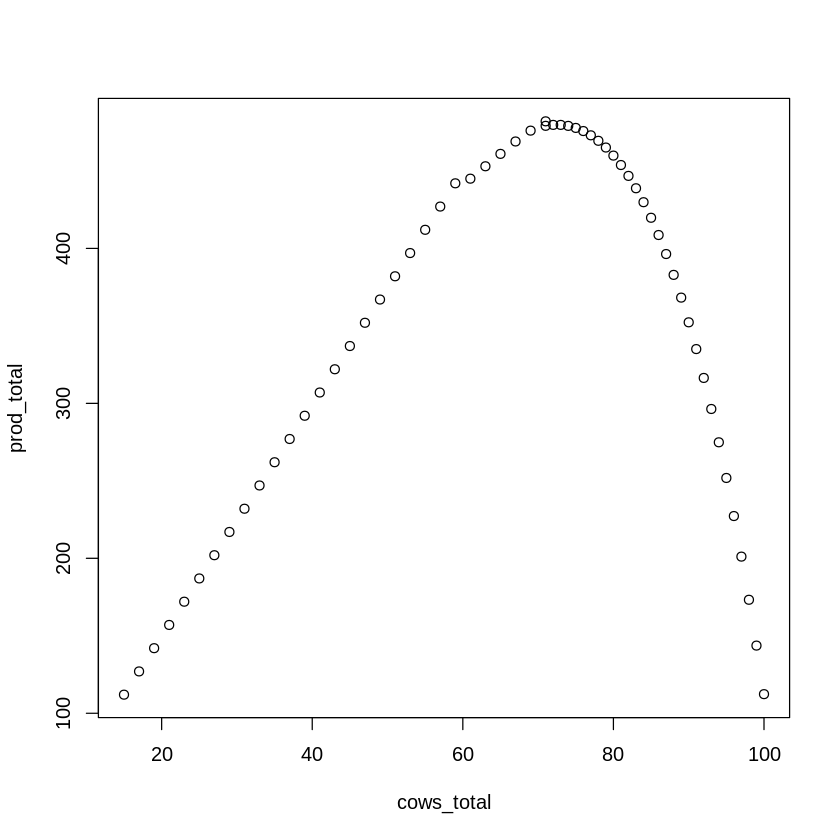

In [114]:
plot(cows_total,prod_total)

Now we will see the mean to gauge whether it is better to add more cows. Now we see that it is actually not, it would actually be better to decrease the number of cows, because each one will begin to produce more milk. 

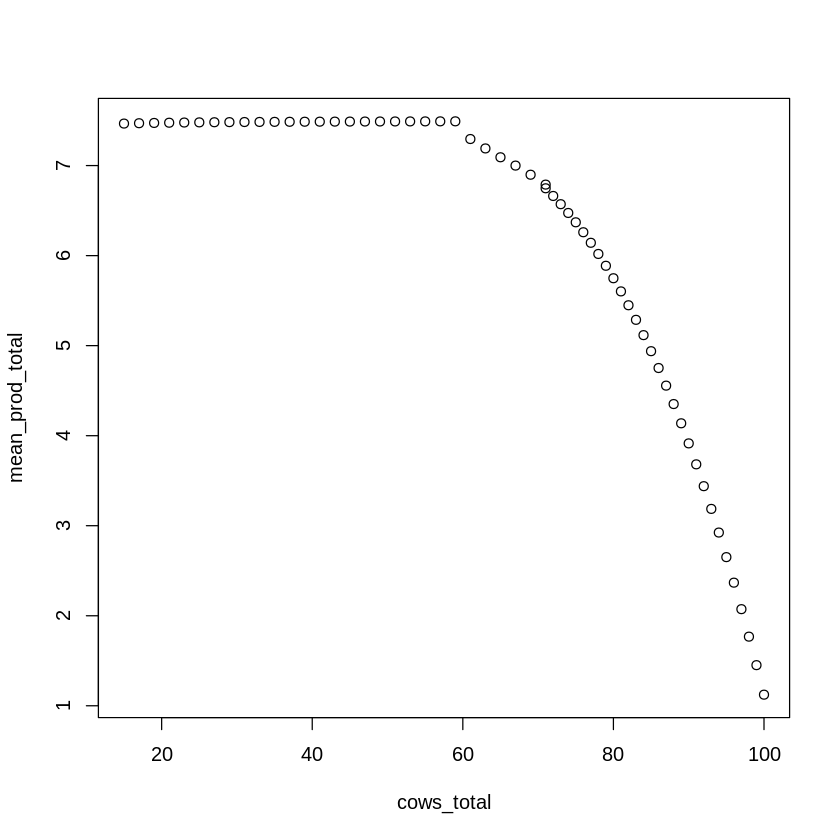

In [115]:
mean_prod_total = prod_total/cows_total
plot(cows_total,mean_prod_total)